In [103]:
import pandas as pd
import numpy as np

In [104]:
df=pd.read_csv("labeled_data.csv")

In [105]:
df.head()
# Columns key:
# count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

# hate_speech = number of CF users who judged the tweet to be hate speech.

# offensive_language = number of CF users who judged the tweet to be offensive.

# neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.

# class = class label for majority of CF users.

# 0 - hate speech
# 1 - offensive  language
# 2 - neither

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [106]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


<Axes: >

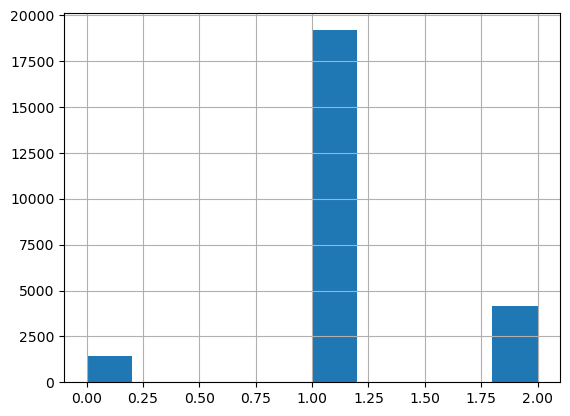

In [107]:
df['class'].hist()
# This histogram shows the imbalanced nature of the task - most tweets containing "hate" words as defined by
# Hatebase were only considered to be offensive by the CF coders. 
# More tweets were considered to be neither hate speech nor offensive language than were considered hate speech.

In [108]:
df['tweet'].dtypes

dtype('O')

In [109]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_text)

df['tweet'] = df['tweet'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,! ! ! RT @ mayasolovely : woman n't complain c...
1,1,3,0,3,0,1,! ! ! ! ! RT @ mleew17 : boy dats cold ... tyg...
2,2,3,0,3,0,1,! ! ! ! ! ! ! RT @ UrKindOfBrand Dawg ! ! ! ! ...
3,3,3,0,2,1,1,! ! ! ! ! ! ! ! ! RT @ C_G_Anderson : @ viva_b...
4,4,6,0,6,0,1,! ! ! ! ! ! ! ! ! ! ! ! ! RT @ ShenikaRoberts ...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,'s muthaf * * * lie & # 8220 ; @ LifeAsKing : ...
24779,25292,3,0,1,2,2,"'ve gone broke wrong heart baby , drove rednec..."
24780,25294,3,0,3,0,1,young buck wan na eat ! ! .. dat nigguh like a...
24781,25295,6,0,6,0,1,youu got wild bitches tellin lies


In [111]:
import re

def preprocess_text(text):
    # Replace URLs with "URLHERE"
    text = re.sub(r'http\S+', 'URLHERE', text)
    # Replace mentions with "MENTIONHERE"
    text = re.sub(r'@\w+', 'MENTIONHERE', text)
    # Replace multiple whitespaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['tweet'] = df['tweet'].apply(preprocess_text)

In [112]:
df['tweet']

0        ! ! ! RT @ mayasolovely : woman n't complain c...
1        ! ! ! ! ! RT @ mleew17 : boy dats cold ... tyg...
2        ! ! ! ! ! ! ! RT @ UrKindOfBrand Dawg ! ! ! ! ...
3        ! ! ! ! ! ! ! ! ! RT @ C_G_Anderson : @ viva_b...
4        ! ! ! ! ! ! ! ! ! ! ! ! ! RT @ ShenikaRoberts ...
                               ...                        
24778    's muthaf * * * lie & # 8220 ; @ LifeAsKing : ...
24779    've gone broke wrong heart baby , drove rednec...
24780    young buck wan na eat ! ! .. dat nigguh like a...
24781                    youu got wild bitches tellin lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [113]:
from nltk.stem import PorterStemmer
import string

def preprocess_and_stem(text):
    # Initialize the Porter Stemmer
    stemmer = PorterStemmer()
    
    # Remove punctuation from the text
    text_no_punct = ''.join(c for c in text if c not in string.punctuation)
    
    # Convert the text to lowercase, tokenize it into words, and apply stemming to each word
    text_lower = text_no_punct.lower()
    words = word_tokenize(text_lower)
    stemmed_tokens = [stemmer.stem(word) for word in words]
    return stemmed_tokens

df['tweet'] = df['tweet'].apply(preprocess_and_stem)

In [114]:
df['tweet']

0        [rt, mayasolov, woman, nt, complain, clean, ho...
1        [rt, mleew17, boy, dat, cold, tyga, dwn, bad, ...
2        [rt, urkindofbrand, dawg, rt, 80sbaby4lif, eve...
3            [rt, cganderson, vivabas, look, like, tranni]
4        [rt, shenikarobert, shit, hear, might, true, m...
                               ...                        
24778    [s, muthaf, lie, 8220, lifeask, 20pearl, corey...
24779    [ve, gone, broke, wrong, heart, babi, drove, r...
24780    [young, buck, wan, na, eat, dat, nigguh, like,...
24781                [youu, got, wild, bitch, tellin, lie]
24782    [ruffl, ntac, eileen, dahlia, beauti, color, c...
Name: tweet, Length: 24783, dtype: object

In [141]:
X_text = df['tweet'].apply(' '.join)  # Convert lists of strings to space-separated strings
y = df['class']

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

In [145]:
# Create the TF-IDF vectorizer and transform the training data
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)

In [148]:
# Create the logistic regression model and fit it to the data
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [149]:
# For example, you can transform the test data using the same vectorizer and make predictions:
X_test_tfidf = vectorizer.transform(X_test)
y_pred = model.predict(X_test_tfidf)

In [150]:
# Print predicted labels and actual labels
print("Predicted labels:", y_pred)
print("Actual labels   :", y_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Predicted labels: [1 1 1 ... 1 1 1]
Actual labels   : 2281     1
15914    1
18943    2
16407    1
13326    1
        ..
3310     0
22759    1
21953    1
9056     1
13246    1
Name: class, Length: 4957, dtype: int64
Accuracy: 0.8880371192253379
